# Data Analysis Interview Challenge

This is your chance to wow us with creative and rigorous solutions! Please include your code at
the end of your submission, or in a separate file. We also accept incomplete solutions.

## Part 1 ‐ Exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [243]:
df = pd.read_json("logins.json")

In [244]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [246]:
df.columns

Index(['login_time'], dtype='object')

In [247]:
df.shape

(93142, 1)

In [248]:
# setting the index for the data
df = df.set_index(['login_time'])
df['count'] = 1

In [249]:
df.head()

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [250]:
df.sort_values(by='login_time')

,count
login_time,
1970-01-01 20:12:16,1
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:36,1
1970-01-01 20:16:37,1
...,...
1970-04-13 18:48:52,1
1970-04-13 18:50:19,1
1970-04-13 18:54:02,1


In [251]:
#refrence https://www.youtube.com/watch?v=l4dvMiSDBzs
#reference https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html
df = df.resample('15T', closed='right', label='right').sum()
df.head()

,count
login_time,
1970-01-01 20:15:00,2
1970-01-01 20:30:00,6
1970-01-01 20:45:00,9
1970-01-01 21:00:00,7
1970-01-01 21:15:00,1


In [252]:
df.shape

(9788, 1)

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:15:00 to 1970-04-13 19:00:00
Freq: 15T
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   9788 non-null   int64
dtypes: int64(1)
memory usage: 152.9 KB


In [254]:
df.tail()

,count
login_time,
1970-04-13 18:00:00,5
1970-04-13 18:15:00,5
1970-04-13 18:30:00,2
1970-04-13 18:45:00,7
1970-04-13 19:00:00,6


In [255]:
y = df['count']

<AxesSubplot:xlabel='login_time'>

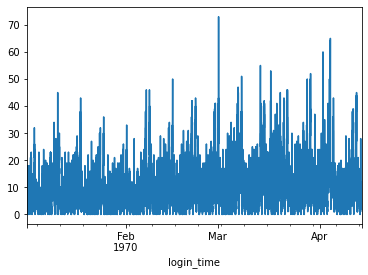

In [256]:
y.plot()

In [257]:
#Please report/illustrate important features of the demand, such as daily cycles.
df.index

DatetimeIndex(['1970-01-01 20:15:00', '1970-01-01 20:30:00',
               '1970-01-01 20:45:00', '1970-01-01 21:00:00',
               '1970-01-01 21:15:00', '1970-01-01 21:30:00',
               '1970-01-01 21:45:00', '1970-01-01 22:00:00',
               '1970-01-01 22:15:00', '1970-01-01 22:30:00',
               ...
               '1970-04-13 16:45:00', '1970-04-13 17:00:00',
               '1970-04-13 17:15:00', '1970-04-13 17:30:00',
               '1970-04-13 17:45:00', '1970-04-13 18:00:00',
               '1970-04-13 18:15:00', '1970-04-13 18:30:00',
               '1970-04-13 18:45:00', '1970-04-13 19:00:00'],
              dtype='datetime64[ns]', name='login_time', length=9788, freq='15T')

In [258]:
# lets find data for monthly, yearly, daily cycles 
df['timestamp'] = pd.to_datetime(df.index)
# we dont need year as the data is only for 1970 year for a quarter (jan, feb, mar, april)
#df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour
#series.dt.week Deprecated since version 1.1.0. Please call Series.dt.isocalendar() and access the week column instead.
df['week'] = df['timestamp'].dt.isocalendar().week
#The day of the week with Monday=0, Sunday=6.
df['weekday'] = df['timestamp'].dt.dayofweek

In [259]:
df

,count,timestamp,month,day,hour,week,weekday
login_time,,,,,,,
1970-01-01 20:15:00,2,1970-01-01 20:15:00,1,1,20,1,3
1970-01-01 20:30:00,6,1970-01-01 20:30:00,1,1,20,1,3
1970-01-01 20:45:00,9,1970-01-01 20:45:00,1,1,20,1,3
1970-01-01 21:00:00,7,1970-01-01 21:00:00,1,1,21,1,3
1970-01-01 21:15:00,1,1970-01-01 21:15:00,1,1,21,1,3
...,...,...,...,...,...,...,...
1970-04-13 18:00:00,5,1970-04-13 18:00:00,4,13,18,16,0
1970-04-13 18:15:00,5,1970-04-13 18:15:00,4,13,18,16,0
1970-04-13 18:30:00,2,1970-04-13 18:30:00,4,13,18,16,0


###### Lets find login activities now
Monthly Login Activity:

In [260]:
df.groupby('month')['count'].sum()

month
1    21225
2    24669
3    33728
4    13520
Name: count, dtype: int64

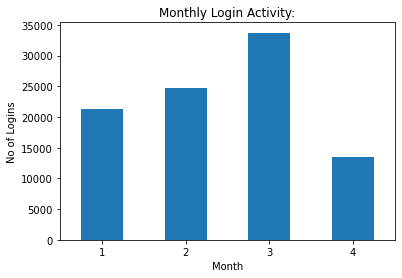

In [261]:
x = df.groupby('month')['count'].sum()
x.plot(kind='bar')
plt.title("Monthly Login Activity:")
plt.xlabel("Month")
plt.ylabel("No of Logins")
plt.xticks(rotation=0)
plt.show()

- March month shows more login activity

In [262]:
april_month_data = df[df['month'] == 4]
max_apr_day = april_month_data['day'].max()
min_apr_day = april_month_data['day'].min()
max_apr_day, min_apr_day

(13, 1)

- We have only 13 days of data for april. so we can not say if the login number would increase in april. we have less number of data to compare against jan , feb and march

###### Weekly Login Activity:

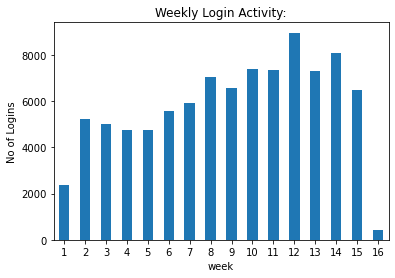

In [263]:
x = df.groupby('week')['count'].sum()
x.plot(kind='bar')
plt.title("Weekly Login Activity:")
plt.xlabel("week")
plt.ylabel("No of Logins")
plt.xticks(rotation=0)
plt.show()

- 12th week shows highest login activity. 
- 16th week shows the least activity as it is april data and it is less data.

###### WeekDay or Daily Login Activity:

In [264]:
x = df.groupby('weekday')['count'].sum()

In [265]:
x

weekday
0     8849
1     9227
2    10282
3    11952
4    15150
5    19434
6    18248
Name: count, dtype: int64

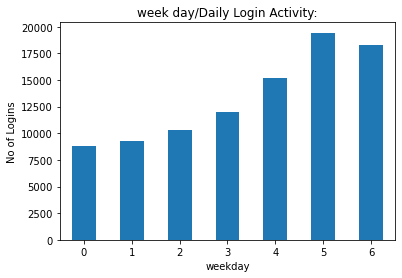

In [266]:
x.plot(kind='bar')
plt.title("week day/Daily Login Activity:")
plt.xlabel("weekday")
plt.ylabel("No of Logins")
plt.xticks(rotation=0)
plt.show()

- Week Day 5 i.e saturday shows highest activity. and Monday shows less.

###### Hourly Login Activity:

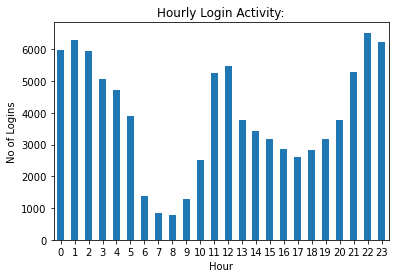

In [267]:
x = df.groupby('hour')['count'].sum()
x.plot(kind='bar')
plt.title("Hourly Login Activity:")
plt.xlabel("Hour")
plt.ylabel("No of Logins")
plt.xticks(rotation=0)
plt.show()

- Above plot shows, there is more activity between 10 am to 5 am. and less activity between 6 am to 9 am
- maximum activity occured at 10pm in the night.

## Summary
- No of login activity is increasing from jan to march. March month shows highest login activity.
- 12th week showed largest number of activity. It is the week of march. 14th week showed second highest activity.
- Week Day 5 i.e saturday showed highest activity and Monday shows less.
- login activity s more between 10am to 5am. There is less activity between 6am to 9am. 